In [62]:
import  numpy as np
import numpy.linalg as la
from scipy.sparse import random
import scipy.sparse as sparse

In [63]:
def jacobi(A,x,b,max_iter = 100,epsilon = 10e-5,w=1/100):
    D = np.diag(np.diag(A))
    norm_b = la.norm(b)
    D_inv = la.inv(D)
    r_vector = []
    for i in range(max_iter):
        x = x + w * D_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector

In [64]:
def Gauss_Seidal(A,x,b,max_iter = 100,epsilon = 10e-4):
    # todo: understand it better :(
    M = np.tril(A) # represent L + D
    norm_b = la.norm(b)
    M_inv = la.inv(M)
    r_vector = []
    for i in range(max_iter):
        x = x + M_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector


In [65]:
def SD(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * (b - A @ x)
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector

In [66]:
def CG(A,x,b,max_iter = 100,epsilon = 10e-4):
    norm_b = la.norm(b)
    r = b - A @ x
    p = r
    alpha = 0
    r_vector = []
    for i in range(max_iter):
        rk = b - A @ x
        alpha = (rk @ rk) / (rk @ (A@rk))
        x = x + alpha * p
        r_prev = r
        r = b  - A @ x
        r_norm = la.norm(r)
        r_vector.append(r_norm)
        if r_norm / norm_b < epsilon:
           break
        beta =   np.inner(r,r) / np.inner(r_prev,r_prev)
        p = r + beta * p

    return x,r_vector

type <class 'numpy.ndarray'>
(256, 256)



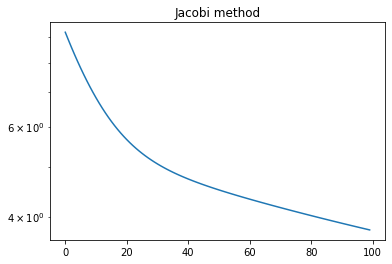

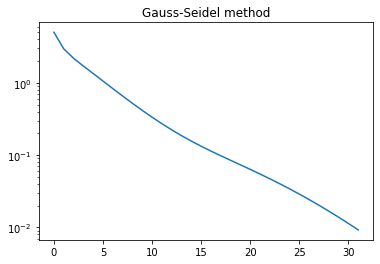

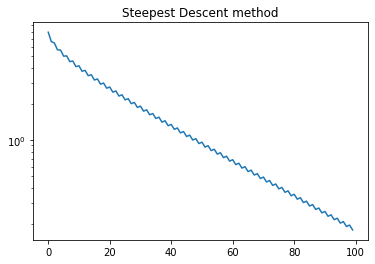

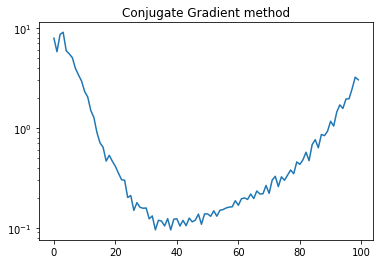

In [67]:
n = 256
A = random(n, n, 5 / n, dtype=float)
v = np.random.rand(n)
v = sparse.spdiags(v, 0, v.shape[0], v.shape[0], 'csr')
A = A.transpose() * v * A + 0.1*sparse.eye(n)
b = np.random.rand(n)
x_start = np.zeros(n)
A = np.array(A.toarray())
print(f'type {type(A)}')
print(A.shape)
print()

x_jacobi,r_jacobi = jacobi(A,x_start,b)
x_gs, r_gs = Gauss_Seidal(A,x_start,b)
x_sd, r_sd = SD(A,x_start,b)
x_cg, r_cg = CG(A,x_start,b)
import matplotlib.pyplot as plt
plt.semilogy(r_jacobi)
plt.title("Jacobi method")
plt.show()
plt.semilogy(r_gs)
plt.title("Gauss-Seidel method")
plt.show()
plt.semilogy(r_sd)
plt.title("Steepest Descent method")
plt.show()
plt.semilogy(r_cg)
plt.title("Conjugate Gradient method")
plt.show()



Jacobi method took 56 iteration


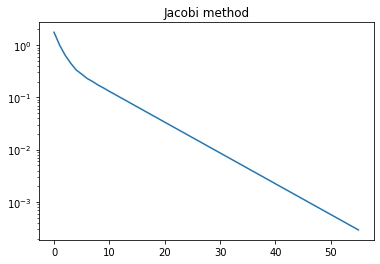

In [68]:
L = np.array(
    [[2, -1, -1, 0, 0, 0, 0, 0, 0, 0],
[-1, 2, -1, 0, 0, 0, 0, 0, 0, 0],
[-1, -1, 3 ,-1, 0, 0, 0, 0, 0, 0],
[0, 0, -1, 5, -1, 0, -1, 0, -1, -1],
[0, 0, 0, -1, 4, -1, -1, -1, 0, 0],
[0, 0, 0, 0, -1, 3, -1, -1, 0, 0],
[0, 0, 0, -1, -1, -1, 5, -1, 0, -1],
[0, 0, 0, 0, -1, -1, -1, 4, 0, -1],
[0, 0, 0, -1, 0, 0, 0, 0, 2, -1],
[0, 0, 0, -1, 0, 0, -1, -1, -1, 4]])
b_L = np.array([1,-1,1,-1,1,-1,1,-1,1,-1])
x_start_ = np.zeros(10)
x_jacobi,r_jacobi = jacobi(L,x_start_,b_L,w=1)
print(f'Jacobi method took {len(r_jacobi)} iteration')
plt.semilogy(r_jacobi)
plt.title("Jacobi method")
plt.show()

In [69]:
from scipy.linalg import block_diag
def jacobi2(A,x,b,max_iter = 100,epsilon = 10e-5,w=1/100):
    M1 = np.array([A[i][:3] for i in range (3)])
    M2 = np.array([A[i][3:11] for i in range (3,10)])
    M1_inv = la.inv(M1)
    M2_inv = la.inv(M2)
    norm_b = la.norm(b)
    D_inv = block_diag(M1_inv,M2_inv)
    r_vector = []
    for i in range(max_iter):
        x = x + w * D_inv @ (b - A @ x)
        # verify
        r = la.norm(A @ x - b)
        r_vector.append(r)
        if r / norm_b < epsilon:
           break
    return x,r_vector

Jacobi method took 10 iteration


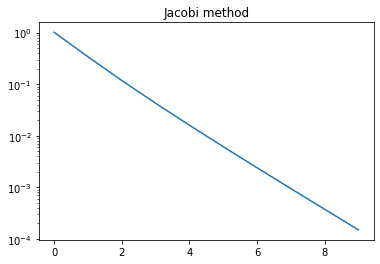

In [70]:
x_start_ = np.zeros(10)
x_jacobi,r_jacobi = jacobi2(L,x_start_,b_L,w=0.7)
print(f'Jacobi method took {len(r_jacobi)} iteration')
plt.semilogy(r_jacobi)
plt.title("Jacobi method")
plt.show()